In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt 
import surprise
from sklearn.metrics import precision_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_json('Clothing_Shoes_and_Jewelry_5.json',lines=True)
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [3]:
df.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [4]:
#Handling misssing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      452
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [5]:
#Droping rows with missing value
df= df.dropna()

In [6]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [7]:
df['overall'].value_counts()

5    162954
4     58274
3     30387
2     15441
1     11169
Name: overall, dtype: int64

In [8]:
#Handling reviewTime column
new = df["reviewTime"].str.split(",",n=1,expand= True)
df["date"]=new[0]
df["year"]= new[1]
df=df.drop(['reviewTime'],axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,date,year
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,02 12,2011
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,01 19,2013
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,01 4,2013
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,04 27,2014
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,03 15,2014


In [9]:
#Further splitting date
new1 = df['date'].str.split(" ",n=1,expand=True)
df["month"]= new1[0]
df["day"]= new1[1]
df=df.drop(['date'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,year,month,day
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,2011,02,12
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,2013,01,19
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,2013,01,4
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,2014,04,27
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,2014,03,15


In [10]:
#Concatenating review_text and summary
df['reviews'] = df['reviewText']+ df['summary']
df = df.drop(['reviewText','summary'],axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,year,month,day,reviews
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",5,1297468800,2011,02,12,This is a great tutu and at a really great pri...
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",5,1358553600,2013,01,19,I bought this for my 4 yr old daughter for dan...
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",5,1357257600,2013,01,4,What can I say... my daughters have it in oran...
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]",5,1398556800,2014,04,27,"We bought several tutus at once, and they are ..."
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",5,1394841600,2014,03,15,Thank you Halo Heaven great product for Little...


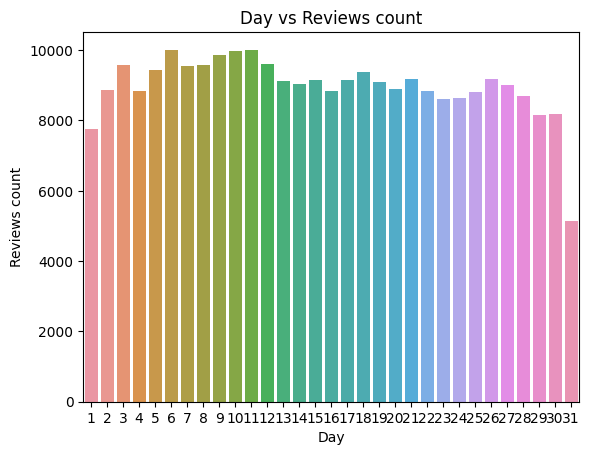

In [11]:
day=pd.DataFrame(df.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()


In [12]:
relevant_columns = ['reviewerID', 'asin', 'reviews', 'overall']
df = df[relevant_columns]

In [13]:
df.head()

,reviewerID,asin,reviews,overall
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5
2,A1RLQXYNCMWRWN,0000031887,What can I say... my daughters have it in oran...,5
3,A8U3FAMSJVHS5,0000031887,"We bought several tutus at once, and they are ...",5
4,A3GEOILWLK86XM,0000031887,Thank you Halo Heaven great product for Little...,5


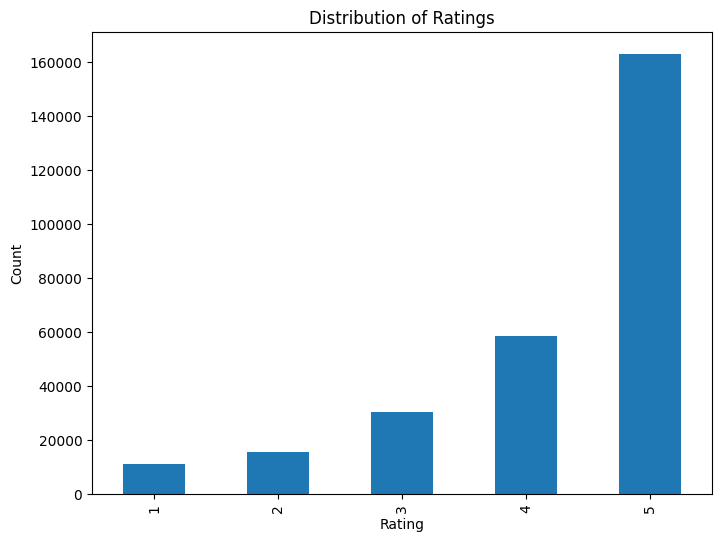

In [14]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
df['overall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [15]:
# Top-rated products
top_rated_products = df.groupby('asin')['overall'].mean().nlargest(10)
print("Top Rated Products:")
print(top_rated_products)

Top Rated Products:
asin
B00007AS82    5.0
B000086Q9O    5.0
B0000ASDJH    5.0
B0000DYNCP    5.0
B0000WL1Q0    5.0
B0000ZFEWY    5.0
B0001NLS6Q    5.0
B0001NLSFW    5.0
B0001XLSWA    5.0
B00020J0ZE    5.0
Name: overall, dtype: float64


In [16]:
max_ratings = df.groupby(['reviewerID','asin'])['overall'].max().sort_values(ascending=False)
max_ratings.head()


reviewerID             asin      
A001114613O3F18Q5NVR6  B000J6ZYL0    5
A3644XBFGBTDIA         B005BWB2QI    5
A363UBWMIZA2J6         B00BFY46XC    5
A363V63XHJWXPK         B000ML7OXI    5
                       B00AEA14BK    5
Name: overall, dtype: int64

In [17]:
min_ratings = df.groupby(['reviewerID','asin'])['overall'].min().sort_values(ascending=False)
min_ratings.head()


reviewerID             asin      
A001114613O3F18Q5NVR6  B000J6ZYL0    5
A3644XBFGBTDIA         B005BWB2QI    5
A363UBWMIZA2J6         B00BFY46XC    5
A363V63XHJWXPK         B000ML7OXI    5
                       B00AEA14BK    5
Name: overall, dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
#Analysis of how many product rating given by a particular user 
no_of_rated_products_per_user = df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

reviewerID
A2J4XMWKR8PPD0    136
A2GA55P7WGHJCP     76
A2KBV88FL48CFS     69
AENH50GW3OKDA      68
A2V5R832QCSOMX     62
Name: overall, dtype: int64

In [20]:
no_of_rated_products_per_user.describe().astype(int).T

count    39386
mean         7
std          3
min          1
25%          5
50%          6
75%          8
max        136
Name: overall, dtype: int64

<Axes: >

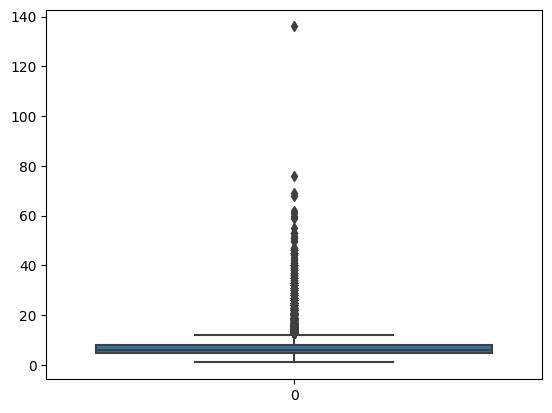

In [21]:
sns.boxplot(data=no_of_rated_products_per_user)

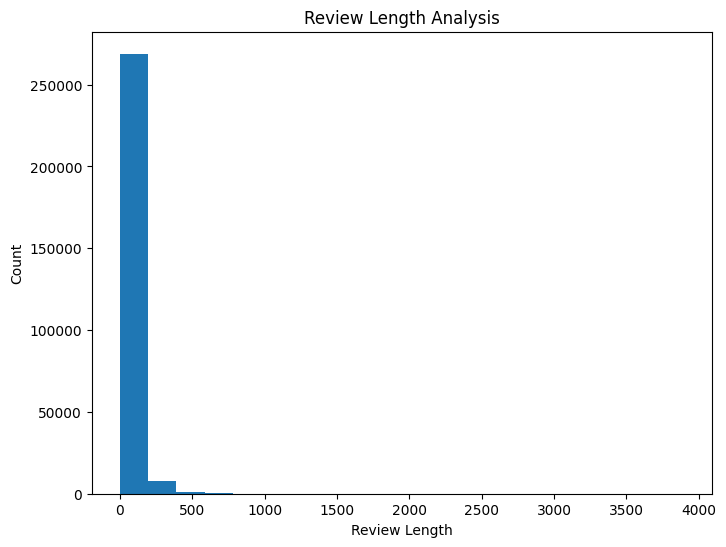

In [22]:
# Review length analysis
df['review_length'] = df['reviews'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
df['review_length'].plot(kind='hist', bins=20)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Review Length Analysis')
plt.show()

In [23]:
# User and item statistics
user_counts = df['reviewerID'].value_counts()
item_counts = df['asin'].value_counts()

print("User Statistics:")
print(user_counts.describe())

print("Item Statistics:")
print(item_counts.describe())

User Statistics:
count    39386.000000
mean         7.064058
std          3.583039
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max        136.000000
Name: reviewerID, dtype: float64
Item Statistics:
count    23026.000000
mean        12.083080
std         13.938001
min          2.000000
25%          6.000000
50%          8.000000
75%         13.000000
max        441.000000
Name: asin, dtype: float64


In [24]:
# Drop duplicate rows based on 'reviewerID', 'asin', and 'reviewText' columns
df.drop_duplicates(subset=['reviewerID', 'asin', 'reviews'], keep='first', inplace=True)

In [25]:
#Find the minimum and maximum ratings - It is between 1 and 5
print('Minimum rating is: %d' %(df.overall.min()))
print('Maximum rating is: %d' %(df.overall.max()))

Minimum rating is: 1
Maximum rating is: 5


In [26]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shreyaghimire/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyaghimire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreyaghimire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and symbols
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the text preprocessing function to the 'reviewText' column
df['preprocessed_review'] = df['reviews'].apply(preprocess_text)

# Print the preprocessed DataFrame
print(df.head())

       reviewerID        asin  \
0  A1KLRMWW2FWPL4  0000031887   
1  A2G5TCU2WDFZ65  0000031887   
2  A1RLQXYNCMWRWN  0000031887   
3   A8U3FAMSJVHS5  0000031887   
4  A3GEOILWLK86XM  0000031887   

                                             reviews  overall  review_length  \
0  This is a great tutu and at a really great pri...        5             39   
1  I bought this for my 4 yr old daughter for dan...        5             62   
2  What can I say... my daughters have it in oran...        5             67   
3  We bought several tutus at once, and they are ...        5             77   
4  Thank you Halo Heaven great product for Little...        5             83   

                                 preprocessed_review  
0  great tutu really great price doesnt look chea...  
1  bought 4 yr old daughter dance class wore toda...  
2  say daughter orange black white pink thinking ...  
3  bought several tutu got high review sturdy see...  
4  thank halo heaven great product little gir

In [29]:
df.head()

,reviewerID,asin,reviews,overall,review_length,preprocessed_review
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5,39,great tutu really great price doesnt look chea...
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5,62,bought 4 yr old daughter dance class wore toda...
2,A1RLQXYNCMWRWN,0000031887,What can I say... my daughters have it in oran...,5,67,say daughter orange black white pink thinking ...
3,A8U3FAMSJVHS5,0000031887,"We bought several tutus at once, and they are ...",5,77,bought several tutu got high review sturdy see...
4,A3GEOILWLK86XM,0000031887,Thank you Halo Heaven great product for Little...,5,83,thank halo heaven great product little girl gr...


In [30]:

def recommend_popularity_based(df, k=10):
    # Group the data by 'asin' and count the occurrences
    popularity = df.groupby('asin').size().reset_index(name='popularity')
    
    # Sort the items by popularity in descending order
    popularity = popularity.sort_values('popularity', ascending=False)
    
    # Get the top-k most popular items
    top_items = popularity.head(k)['asin']
    
    return top_items.tolist()

# Example usage
top_items = recommend_popularity_based(df, k=10)
print("Top Recommended Items:")
for asin in top_items:
    print(f"ASIN: {asin}")


Top Recommended Items:
ASIN: B005LERHD8
ASIN: B005GYGD7O
ASIN: B008WYDP1C
ASIN: B0058XIMMM
ASIN: B00CKGB85I
ASIN: B007RD9DS8
ASIN: B002RADHJC
ASIN: B000T9VK56
ASIN: B0000C321X
ASIN: B0001ZNZJM


In [31]:
#Training content based recommendation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
ratings_new = df.iloc[:25000 , :]
review_texts = ratings_new['preprocessed_review'].astype(str)
tfidf = TfidfVectorizer(analyzer= 'word', ngram_range=(1,3),stop_words='english', lowercase=True, encoding='utf-8')
tfidf_matrix = tfidf.fit_transform(review_texts)
sim_scores= linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
ratings_new.head()

,reviewerID,asin,reviews,overall,review_length,preprocessed_review
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5,39,great tutu really great price doesnt look chea...
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5,62,bought 4 yr old daughter dance class wore toda...
2,A1RLQXYNCMWRWN,0000031887,What can I say... my daughters have it in oran...,5,67,say daughter orange black white pink thinking ...
3,A8U3FAMSJVHS5,0000031887,"We bought several tutus at once, and they are ...",5,77,bought several tutu got high review sturdy see...
4,A3GEOILWLK86XM,0000031887,Thank you Halo Heaven great product for Little...,5,83,thank halo heaven great product little girl gr...


In [34]:
#splitting dataset into training and testing sets
#ratings_new = df.iloc[:25000, :]
train = df.iloc[:(int(0.8 * ratings_new.shape[0])+1), :]
test = df.iloc[(int(0.8 * ratings_new.shape[0])+1):, :]
print("TRAIN:\n",train,"\n\nTEST:\n",test)

TRAIN:
            reviewerID        asin  \
0      A1KLRMWW2FWPL4  0000031887   
1      A2G5TCU2WDFZ65  0000031887   
2      A1RLQXYNCMWRWN  0000031887   
3       A8U3FAMSJVHS5  0000031887   
4      A3GEOILWLK86XM  0000031887   
...               ...         ...   
20007  A2UE103KUM9WA9  B000BMIUTU   
20008  A1F7YU6O5RU432  B000BMPRCS   
20009  A2ZWH9A89QNTBT  B000BMPRCS   
20010   AF04M51PXZC58  B000BMPRCS   
20011  A3B75J6Q2KFAVM  B000BMPRCS   

                                                 reviews  overall  \
0      This is a great tutu and at a really great pri...        5   
1      I bought this for my 4 yr old daughter for dan...        5   
2      What can I say... my daughters have it in oran...        5   
3      We bought several tutus at once, and they are ...        5   
4      Thank you Halo Heaven great product for Little...        5   
...                                                  ...      ...   
20007  This is terrific! Just what I was looking for....        

In [35]:
pred = df['overall'].median()
pred

5.0

In [36]:
ratings_new.head()

,reviewerID,asin,reviews,overall,review_length,preprocessed_review
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5,39,great tutu really great price doesnt look chea...
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5,62,bought 4 yr old daughter dance class wore toda...
2,A1RLQXYNCMWRWN,0000031887,What can I say... my daughters have it in oran...,5,67,say daughter orange black white pink thinking ...
3,A8U3FAMSJVHS5,0000031887,"We bought several tutus at once, and they are ...",5,77,bought several tutu got high review sturdy see...
4,A3GEOILWLK86XM,0000031887,Thank you Halo Heaven great product for Little...,5,83,thank halo heaven great product little girl gr...


In [37]:
pvt = ratings_new.pivot_table(index='reviewerID', columns='asin', values= 'overall')
pvt.fillna(0,inplace=True)
pvt

asin,0000031887,0123456479,1608299953,1617160377,B00001W0KA,B00001WRHJ,B00004SR8W,B00004SR8Z,B00004SR9P,B00004U1J2,...,B000FP79H2,B000FPVUJA,B000FPWA8K,B000FPX5Y8,B000FPZ47O,B000FQ0WC0,B000FQCX1I,B000FRVEL2,B000FS3JNW,B000FS3KFY
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00635603LUUJQPQWSJW1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0145698H8AAYMRXLBD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0148968UM59JS3Y8D1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02155413BVL8D0G7X6DN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02324053VU4N09WNQTBN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYP4FQ2L2C4O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYZQ7I9L7G3G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZHJIL9S6XZ5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print(pvt.index.tolist())

['A00635603LUUJQPQWSJW1', 'A0145698H8AAYMRXLBD8', 'A0148968UM59JS3Y8D1M', 'A02155413BVL8D0G7X6DN', 'A02324053VU4N09WNQTBN', 'A02755422E9NI29TCQ5W3', 'A03749271P4L9K1LN5UNT', 'A03756272FRRX98COZNG7', 'A04095881JK7GJRJYSY4N', 'A04559521ZZJ87IMRVPME', 'A0604201MBJEJ93VKB77', 'A0768747259K2OZVNPZ0H', 'A08129883L3CSLT4GL6CC', 'A0825208308SUUOFJ2SHH', 'A08454962KVSZ29VDDSKZ', 'A091992438CT0KNFRT95D', 'A09379542AJ9HADJUEWOT', 'A097288670N6V5MXLZRB', 'A1001UEHDLCC1Z', 'A100L918633LUO', 'A100UD67AHFODS', 'A100WFKYVRPVX7', 'A101E37WFPUEII', 'A101FR9IA4GDNF', 'A101GG7X49PK0A', 'A1027WM3PXKVMR', 'A102BH7NOAGP6', 'A102MU6ZC9H1N6', 'A102VV2KCZAUZW', 'A103BJIOJSDJL1', 'A103HHE0H07OYZ', 'A103TW8KWPKZT2', 'A103VMN9OENIN6', 'A10465JWIKTSRA', 'A1047EDJ84IMAS', 'A104QGECCAFCI9', 'A104SG9QZ92UAH', 'A1059SSXUZZS1S', 'A105CCKIWRGI3X', 'A10600XI9R2OQ9', 'A1061GUVDRBQRS', 'A106GRKSYBW4X4', 'A106K1RIUF902A', 'A1076V1FMO3G71', 'A1079CQTAUIX6J', 'A107C6XHEWELEO', 'A107F1OFZQLQCZ', 'A107JEWLVU11CY', 'A108C9Q98OBCK

In [39]:
print(pvt.columns.tolist())

['0000031887', '0123456479', '1608299953', '1617160377', 'B00001W0KA', 'B00001WRHJ', 'B00004SR8W', 'B00004SR8Z', 'B00004SR9P', 'B00004U1J2', 'B000051SEN', 'B000051SEP', 'B00005JHKE', 'B00005JSBK', 'B00005KJXN', 'B00005TQI7', 'B0000643Q8', 'B000067R84', 'B00006I551', 'B00006XXGO', 'B0000722HK', 'B000072UMJ', 'B000074RL3', 'B000078CYM', 'B00007AS82', 'B00007FFL9', 'B00007GD8X', 'B00007GD9I', 'B00007GD9W', 'B00007GDAL', 'B00007GDD3', 'B00007GDG5', 'B00007IVVR', 'B000086211', 'B0000862FI', 'B0000864CZ', 'B0000865II', 'B0000866JI', 'B000086778', 'B0000867AN', 'B0000867GG', 'B0000867ON', 'B0000868O9', 'B000086910', 'B00008695M', 'B0000869QI', 'B000086Q9O', 'B0000891IO', 'B0000891K0', 'B00008AALU', 'B00008ECKG', 'B00008I8YM', 'B00008ID0B', 'B00008ID0L', 'B00008ID1O', 'B00008ID39', 'B00008IEUW', 'B00008IOHR', 'B00008IPCG', 'B00008KH9C', 'B00008KI3U', 'B00008LUS5', 'B00009ESZI', 'B00009OXE8', 'B00009QB5V', 'B00009QMR3', 'B00009R881', 'B00009WM7J', 'B00009ZM7Z', 'B0000A4ZJD', 'B0000A51FU', 'B000

In [40]:
from sklearn.metrics.pairwise import pairwise_distances

In [41]:
cosine_sim = 1-pairwise_distances(pvt, metric="cosine")
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
pearson_sim = 1-pairwise_distances(pvt, metric="correlation")
pearson_sim

array([[ 1.00000000e+00, -9.59093987e-04, -1.50470760e-03, ...,
        -6.82128240e-04, -6.82128240e-04, -6.82128240e-04],
       [-9.59093987e-04,  1.00000000e+00, -2.11566671e-03, ...,
        -9.59093987e-04, -9.59093987e-04, -9.59093987e-04],
       [-1.50470760e-03, -2.11566671e-03,  1.00000000e+00, ...,
        -1.50470760e-03, -1.50470760e-03, -1.50470760e-03],
       ...,
       [-6.82128240e-04, -9.59093987e-04, -1.50470760e-03, ...,
         1.00000000e+00, -6.82128240e-04, -6.82128240e-04],
       [-6.82128240e-04, -9.59093987e-04, -1.50470760e-03, ...,
        -6.82128240e-04,  1.00000000e+00, -6.82128240e-04],
       [-6.82128240e-04, -9.59093987e-04, -1.50470760e-03, ...,
        -6.82128240e-04, -6.82128240e-04,  1.00000000e+00]])

In [43]:
from sklearn.neighbors import NearestNeighbors

In [44]:
# Get 10 similar users by nearest neighbors algorithm, defaulting to Pearson correlation coefficient metric
def sim10_users(reviewer_id,pvt,metric="correlation",k=10):
  indices_sim = []
  knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
  knn.fit(pvt)


  distances, indices_sim = knn.kneighbors(pvt.iloc[reviewer_id , :].values.reshape(1, -1), n_neighbors = k+1)
  
   
  sims = 1 - distances.flatten()
  return sims,indices_sim

# Predict ratings
#ALGORITHM :
#1. Get 10 simialr users
#2. Get the mean of all user ratings for that userId
#3. Find sum of all ratings of the similar users obtained.
#4. for all similar users:
    #--> Find rating_diff = (Rating by user j on movie i) - (mean of all user ratings by that user)
   # --> Get updated_rating = updated_rating + (rating_diff * similarity_score(of user j))
#5. Predicted rating = (((step 2.)*updated_rating + step 3.) + 1)




In [45]:
from scipy.stats import pearsonr

def predict_rating(reviewer_id, asin_id,pvt, metric='pearson', k=10):
    if reviewer_id not in pvt.index:
        print(f"Reviewer ID {reviewer_id} not found in the dataset.")
        return None
    if asin_id not in pvt.columns:
        print(f"ASIN ID {asin_id} not found in the dataset.")
        return None
    
    indices_usr = pvt.index.tolist()
    indices_mov = pvt.columns.tolist()
    
    indexu = indices_usr.index(reviewer_id)
    indexm = indices_mov.index(asin_id)
    
    pearson_sim = np.zeros(pvt.shape[0])
    for i in range(pvt.shape[0]):
        pearson_sim[i], _ = pearsonr(pvt.iloc[indexu], pvt.iloc[i])
    
    sims = pearson_sim
    mean_rating = pvt.iloc[indexu, :].mean()
    rtSum = np.sum(sims) - 1
    
    weighted_sum = 0
    for i in range(len(indices_usr)):
        if i == indexu:
            continue
        else:
            rating_diff = pvt.iloc[i, indexm] - mean_rating
            weighted_sum += (sims[i] * rating_diff)
    
    predicted_rating = mean_rating + (weighted_sum / rtSum)
    return predicted_rating

In [46]:
# Test
#predict_rating('A2G5TCU2WDFZ65', 12 , ratings_new)
predict_rating('A2A2WZYLU528RO', 'B0000ANECK' , pvt)

-0.04101977522720383

In [47]:
pvt

asin,0000031887,0123456479,1608299953,1617160377,B00001W0KA,B00001WRHJ,B00004SR8W,B00004SR8Z,B00004SR9P,B00004U1J2,...,B000FP79H2,B000FPVUJA,B000FPWA8K,B000FPX5Y8,B000FPZ47O,B000FQ0WC0,B000FQCX1I,B000FRVEL2,B000FS3JNW,B000FS3KFY
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00635603LUUJQPQWSJW1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0145698H8AAYMRXLBD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0148968UM59JS3Y8D1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02155413BVL8D0G7X6DN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02324053VU4N09WNQTBN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYP4FQ2L2C4O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYZQ7I9L7G3G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZHJIL9S6XZ5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
def rec_product(asin, similarity=None):
    index = indices[asin]

    if similarity is None:
        similarity_matrix = cosine_similarity(tfidf_matrix[index], tfidf_matrix)
    else:
        similarity_matrix = similarity[index].reshape(1, -1)

    if isinstance(similarity_matrix, np.ndarray):
        rec10_ind = np.argsort(similarity_matrix)[0][-10:][::-1]
    else:
        rec10_ind = [0]

    recommended = pd.DataFrame({
        'asin': ratings_new['asin'].iloc[rec10_ind].tolist(),
        'preprocessed_review': ratings_new['preprocessed_review'].iloc[rec10_ind].tolist(),
    })

    # Exclude the input ASIN from the recommended products
    recommended = recommended[recommended['asin'] != asin]

    if recommended.empty:
        print("No recommendations found for the given ASIN.")
    else:
        print(recommended)
rec_product('B000BMPRCS')

         asin                                preprocessed_review
0  B000BMZJ58  great fitting shirt maybe dont know laundry ki...
1  B0001YR4S6  gave shirt 5 star husband love quality shirt w...
2  B0009F9QMO  even though shirt little big quality shirt goo...
3  B0000ANHST  purchased shirt husband use work shirt feel go...
4  B00079ULP8  need pocket think shirt like look better pocke...
5  B000BU0BF8  wear white shirt work part uniform like many p...
6  B0009GA6SQ  shirt fit nice laundry great order several shi...
7  B000A38FW2  great shirt husband really like shirt made wel...
8  B0002XSXWC  great fitting good looking shirt loaded pocket...
9  B0000ANHST  dad husband love tshirts dont wear anything sh...


In [94]:
def hybrid_recommendation(reviewer_id, asin_id, pvt, similarity_scores, content_weight=0.5, k=10):
    # Content-based recommendation
    content_recommendations = rec_product(asin_id, similarity=similarity_scores)

    if content_recommendations is None:
        return []  # Return an empty list if there are no content recommendations

    # Remove the input ASIN from content recommendations
    content_recommendations = content_recommendations[content_recommendations['asin'] != asin_id].reset_index(drop=True)

    # Collaborative filtering prediction
    predicted_ratings = []
    recommended_asins = set()  # To track recommended ASINs

    for asin in content_recommendations['asin']:
        if asin not in recommended_asins:
            predicted_rating = predict_rating(reviewer_id, asin, pvt)
            predicted_ratings.append(predicted_rating)
            recommended_asins.add(asin)

    # Calculate the weighted average of content-based score and predicted rating
    weighted_scores = content_weight * np.ones(len(content_recommendations)) + (1 - content_weight) * np.array(predicted_ratings)
    content_recommendations['weighted_score'] = weighted_scores

    # Sort the recommendations based on the weighted score
    hybrid_recommendations = content_recommendations.sort_values(by='weighted_score', ascending=False)

    # Remove the input ASIN from recommended ASINs
    recommended_asins.discard(asin_id)

    # Remove the ASINs that have already been recommended
    hybrid_recommendations = hybrid_recommendations[~hybrid_recommendations['asin'].isin(recommended_asins)]

    # Return the top k ASINs from the hybrid recommendations
    recommended_asins = hybrid_recommendations['asin'].tolist()[:k]

    return recommended_asins


In [95]:
reviewer_id = 'A02324053VU4N09WNQTBN'  # Replace with the actual reviewer ID
asin_id = 'B00004SR8W'
recommended_asins = hybrid_recommendation(reviewer_id, asin_id, pvt, sim_scores, k=10)
print(recommended_asins)


         asin                                preprocessed_review
1  B0001NLSFW  kipling go travel purse backpack wallet brand ...
2  B0009U7RCK  loved belt traveled europe comfortable spaciou...
3  B0009PCTTQ  family recently traveled two week cruise europ...
4  B0009PCTTQ  actually pretty uncomfortable ive never really...
5  B00007GDG5  clutch wallet passed expectation happy wallet ...
6  B000A13NJO  3 pocket nice front pocket perfect cell phone ...
7  B000BJDPM0  wanted slim bifold wallet instead trifold wall...
8  B000F1NFPG  nothing special great bifold wallet like look ...
9  B000BJDPM0  dog ate husband last wallet shopped around wal...
[]


In [99]:
def coverage(recommended_items):
    # Flatten the list of recommended items from multiple users
    all_recommended_items = [item for sublist in recommended_items for item in sublist]

    # Count the number of unique items
    unique_items = set(all_recommended_items)

    # Calculate the coverage as the proportion of unique items out of total items
    coverage_score = len(unique_items) / len(all_recommended_items)

    return coverage_score


In [100]:
# Example recommended items for three users
recommended_items_user1 = ['B0001NLSFW ', 'B0009U7RCK', 'B0009PCTTQ ']
recommended_items_user2 = ['B0009U7RCK', 'B00007GDG5', 'B000BJDPM0 ']
recommended_items_user3 = ['B0009PCTTQ ', 'B000BJDPM0 ', 'B000BJDPM0']

# Calculate coverage
recommended_items = [recommended_items_user1, recommended_items_user2, recommended_items_user3]
coverage_score = coverage(recommended_items)

print(f"Coverage: {coverage_score}")

Coverage: 0.6666666666666666


In [102]:
def f1_score_at_k(actual_items, recommended_items, k):
    # Convert the recommended items list up to position K
    recommended_at_k = recommended_items[:k]
    
    # Calculate precision at K
    precision = len(set(actual_items) & set(recommended_at_k)) / float(len(recommended_at_k))
    
    # Calculate recall at K
    recall = len(set(actual_items) & set(recommended_at_k)) / float(len(actual_items))
    
    # Calculate F1 score at K
    if precision + recall != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0.0
    
    return f1_score

# Example usage
actual_items_user1 = ['B0001NLSFW', 'B0009U7RCK', 'B0009PCTTQ', 'B000A13NJO']
recommended_items_user1 = ['B0009U7RCK', 'B000BJDPM0', 'B00007GDG5', 'B0001NLSFW', 'B0009PCTTQ']
k = 3

f1_score = f1_score_at_k(actual_items_user1, recommended_items_user1, k)
print(f"F1 score at K={k}: {f1_score}")


F1 score at K=3: 0.28571428571428575
